In [21]:
import pandas as pd

In [22]:
#Читаем данные в датафрейм
df=pd.read_csv("ENB2012_data.csv")

In [23]:
#Симотрим первые 5 строк данных
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84


In [24]:
#Информация о данных 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 54.1 KB


In [25]:
#Общая статистика по данным
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000


In [26]:
#Подключаем графическую библиотеку
import matplotlib.pyplot as plt
%matplotlib inline

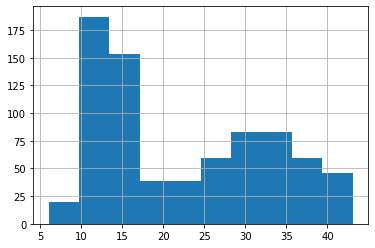

In [27]:
# Строим гистограмму по Y1
df["Y1"].hist()

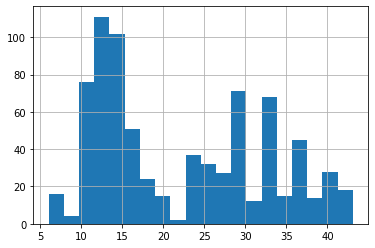

In [28]:
# Можно увеличить количество столбцов
df["Y1"].hist(bins=20)

In [29]:
#Разобъем данные на целевую переменную y и сами данные X
X = df.drop('Y1', axis = 1)
y=  df['Y1']

In [30]:
#Импортируем еще одну графическую библиотеку
import seaborn as sns

c:\users\никита\pycharmprojects\untitled\venv\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


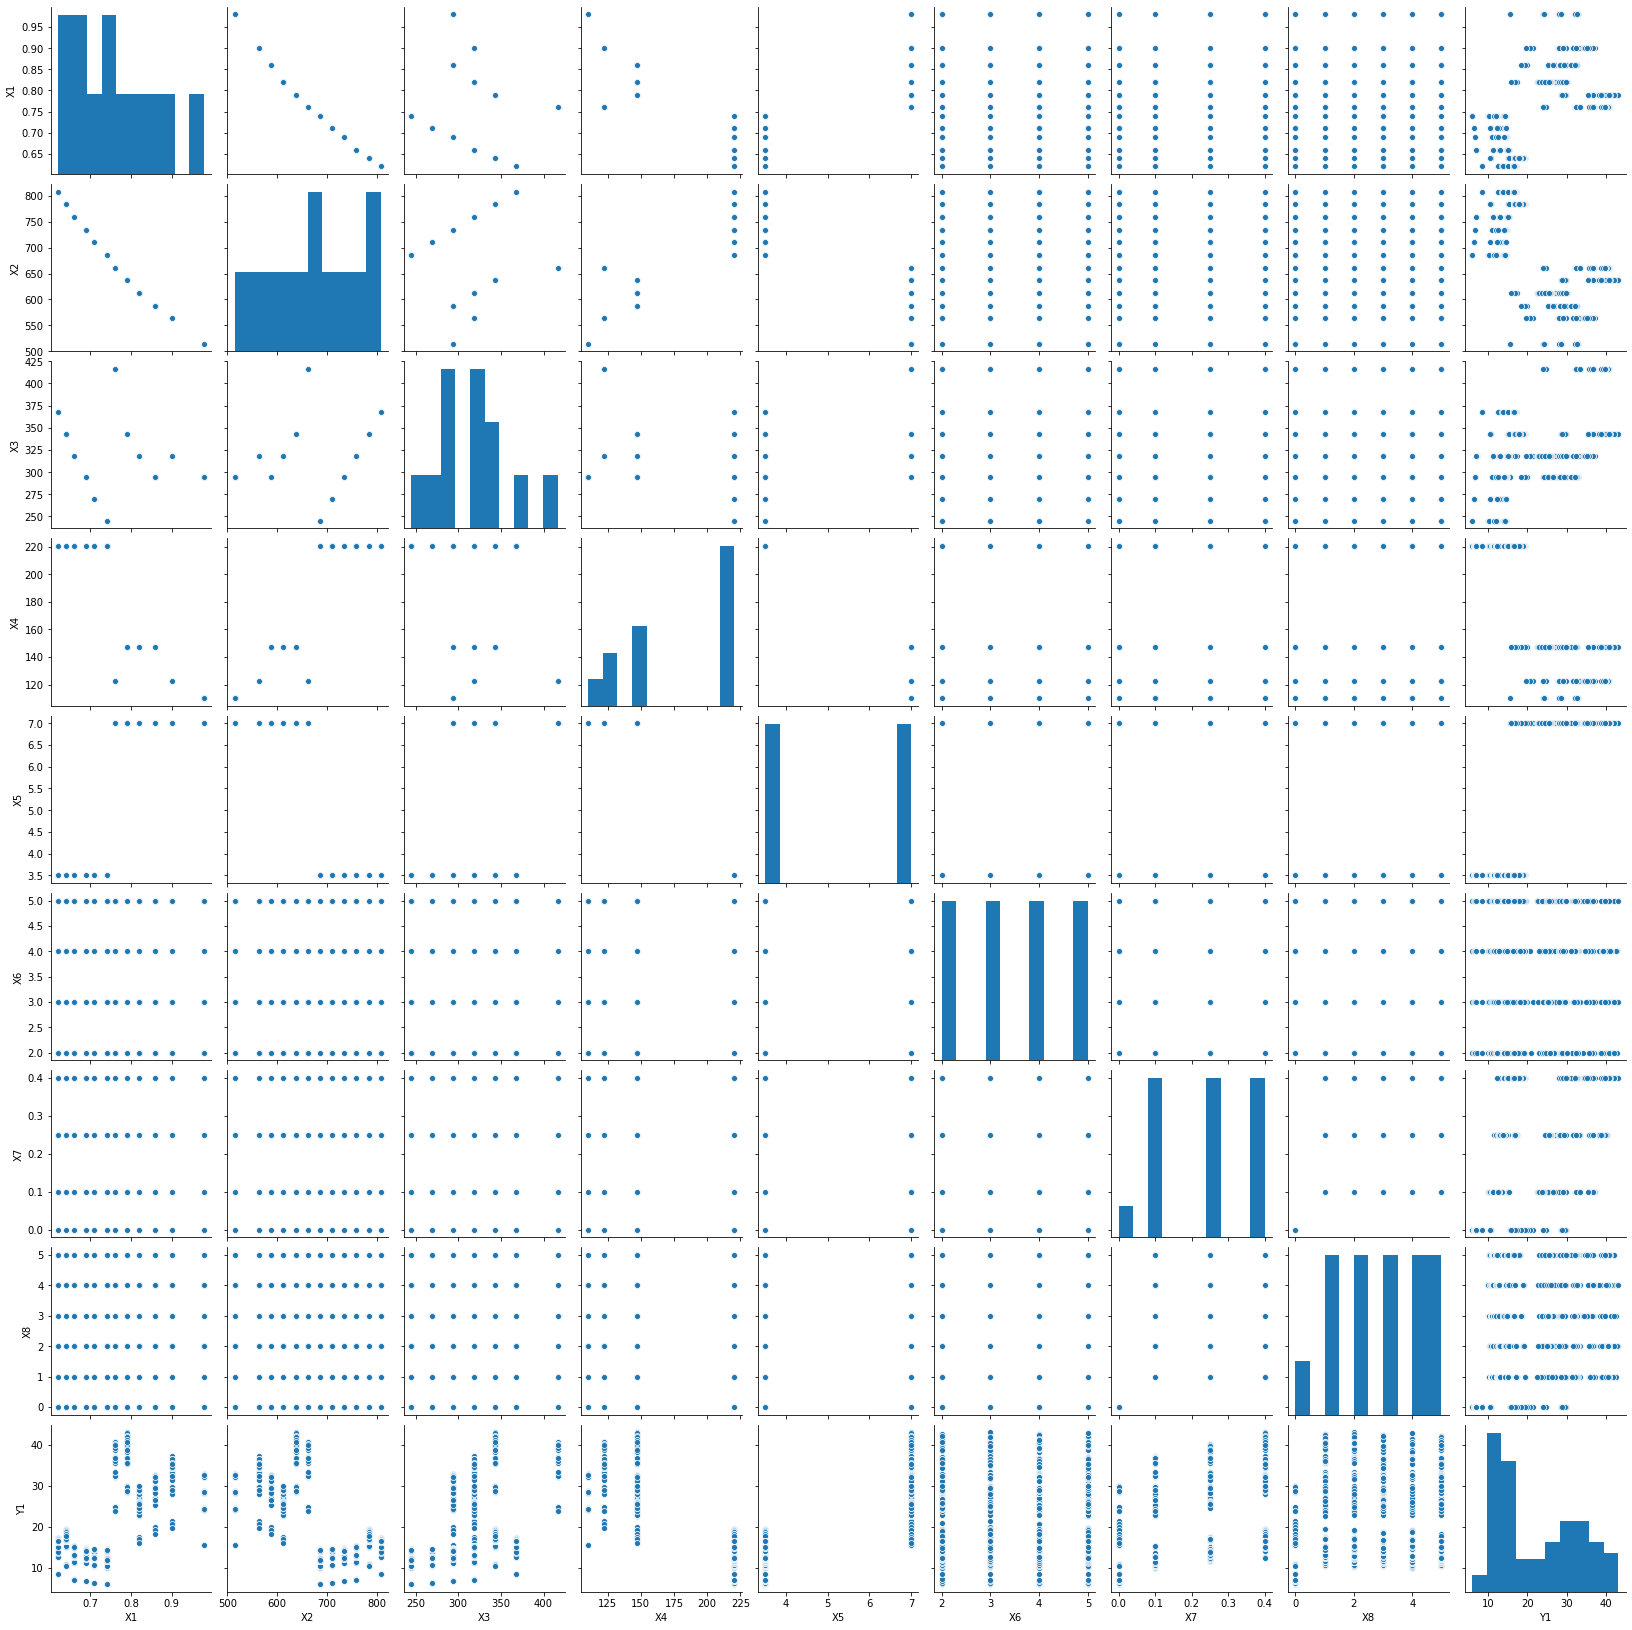

In [32]:
#Попарные графики
sns.pairplot(df, size=2.5)

In [33]:
#Выбросим часть столбцов 
data=df[['X1', 'X5', 'X8', 'Y1']]

c:\users\никита\pycharmprojects\untitled\venv\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


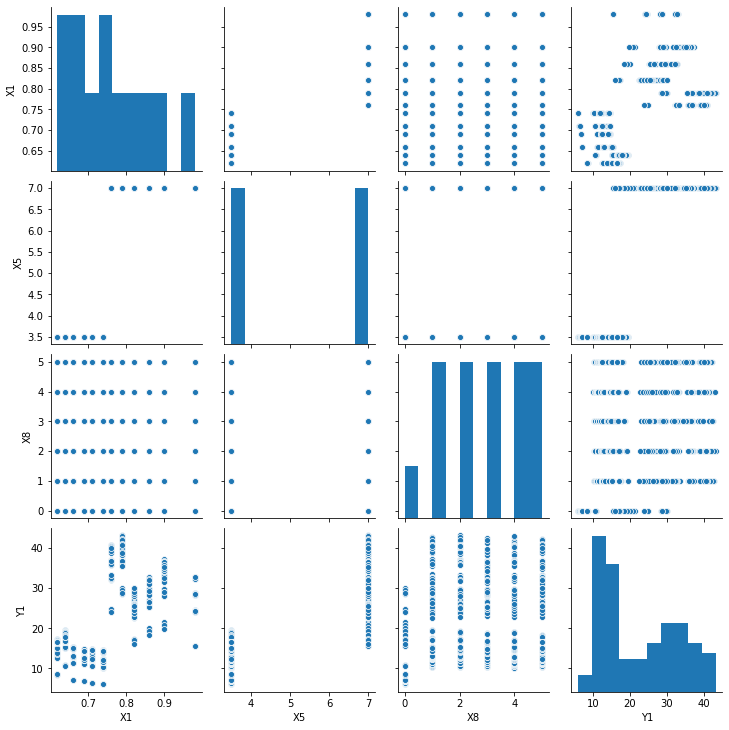

In [34]:
sns.pairplot(data, size=2.5)

In [35]:
#Подключаем метрики
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [36]:
#Разделение данных на тестовую и тренировочную выборки
#Подключаем функцию разделения данных
from sklearn.model_selection import train_test_split

In [37]:
df_train, df_test = train_test_split(df, test_size = 0.3)

#Данные в X, здесь выбросили из датафрейма столбец "medv", axis = 1 указывает, что работа со столбцом
X_train=df_train.drop('Y1', axis = 1)
X_test=df_test.drop('Y1', axis = 1)

#Целевая переменная в y
y_train=df_train['Y1']
y_test=df_test['Y1']

In [38]:
#Подключаем метод Линейной регрессии для работы
from sklearn.linear_model import LinearRegression
# Объявили модель
model_regression = LinearRegression()

In [39]:
# Обучили модель на тренировочной выборке 
model_regression.fit(X_train, y_train)
# Сделали прогнозы на тестовой выборке 
y_test_predict = model_regression.predict(X_test)

In [40]:
import numpy as np

In [41]:
#метрики качества для регрессии
from sklearn.metrics import mean_squared_error, r2_score

In [42]:
y_train_predict = model_regression.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = r2_score(y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
#Печать строки 'RMSE is {}', на месте {} будет подставляться rmse
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set

y_test_predict = model_regression.predict(X_test)
# root mean square error of the model
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))

# r-squared score of the model
r2 = r2_score(y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))


The model performance for training set
--------------------------------------
RMSE is 2.9732099096554823
R2 score is 0.9107934434062321


The model performance for testing set
--------------------------------------
RMSE is 2.8137377068420912
R2 score is 0.9260268481422006
